#### 1.4.10 Histograms in OpenCV

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('sunset.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [3]:
hist.shape

(256, 1)

In [4]:
print(hist)

[[1.0100e+02]
 [1.3400e+02]
 [3.1600e+02]
 [6.6300e+02]
 [1.2140e+03]
 [1.9020e+03]
 [2.5520e+03]
 [3.4810e+03]
 [4.6760e+03]
 [6.2850e+03]
 [8.1570e+03]
 [9.7490e+03]
 [1.0748e+04]
 [1.2142e+04]
 [1.3621e+04]
 [1.4655e+04]
 [1.5297e+04]
 [1.5779e+04]
 [1.6026e+04]
 [1.6203e+04]
 [1.6158e+04]
 [1.6249e+04]
 [1.6220e+04]
 [1.5630e+04]
 [1.5446e+04]
 [1.4898e+04]
 [1.4112e+04]
 [1.2988e+04]
 [1.2032e+04]
 [1.1141e+04]
 [1.0433e+04]
 [1.0067e+04]
 [9.6500e+03]
 [9.4000e+03]
 [9.1720e+03]
 [8.5030e+03]
 [8.0150e+03]
 [7.6860e+03]
 [7.7270e+03]
 [7.6980e+03]
 [7.4010e+03]
 [7.2040e+03]
 [6.8790e+03]
 [6.2880e+03]
 [6.1530e+03]
 [5.9570e+03]
 [5.8580e+03]
 [5.7500e+03]
 [5.7390e+03]
 [5.7450e+03]
 [5.6160e+03]
 [5.6460e+03]
 [5.5610e+03]
 [5.5840e+03]
 [5.5380e+03]
 [5.3620e+03]
 [5.2510e+03]
 [4.9950e+03]
 [5.0320e+03]
 [5.1060e+03]
 [4.9460e+03]
 [5.0650e+03]
 [5.0070e+03]
 [4.8490e+03]
 [4.7690e+03]
 [4.6860e+03]
 [4.5500e+03]
 [4.4970e+03]
 [4.1820e+03]
 [4.1450e+03]
 [3.8470e+03]
 [3.80

In [5]:
hist, bins = np.histogram(img.ravel(),256,[0,256])

In [6]:
print(hist)

[  101   134   316   663  1214  1902  2552  3481  4676  6285  8157  9749
 10748 12142 13621 14655 15297 15779 16026 16203 16158 16249 16220 15630
 15446 14898 14112 12988 12032 11141 10433 10067  9650  9400  9172  8503
  8015  7686  7727  7698  7401  7204  6879  6288  6153  5957  5858  5750
  5739  5745  5616  5646  5561  5584  5538  5362  5251  4995  5032  5106
  4946  5065  5007  4849  4769  4686  4550  4497  4182  4145  3847  3808
  3764  3682  3665  3481  3398  3096  3010  2906  2835  2565  2566  2409
  2459  2439  2473  2593  2672  2628  2693  2725  2595  2715  2667  2513
  2283  2111  2021  1978  1883  1637  1590  1550  1568  1519  1458  1368
  1337  1314  1405  1405  1404  1407  1310  1282  1226  1118  1047  1012
  1013   979   864   847   811   795   768   786   751   776   763   769
   738   760   713   692   678   690   660   610   586   583   611   555
   527   523   513   502   496   441   424   416   434   410   412   399
   363   327   316   291   292   248   212   213   

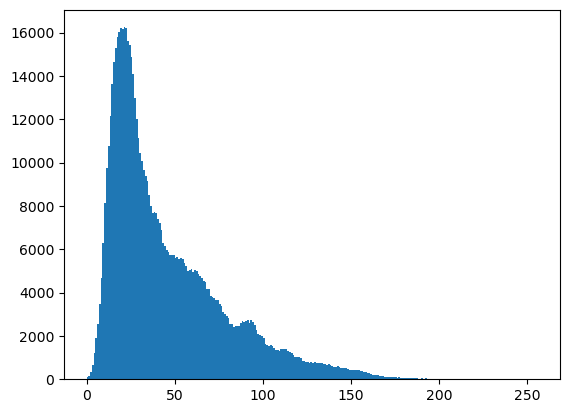

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

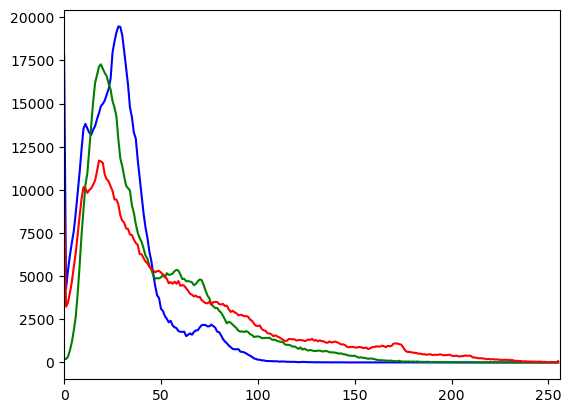

In [8]:
img = cv2.imread('sunset.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [18]:
img = cv2.imread('sunset.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:620, 100:860] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

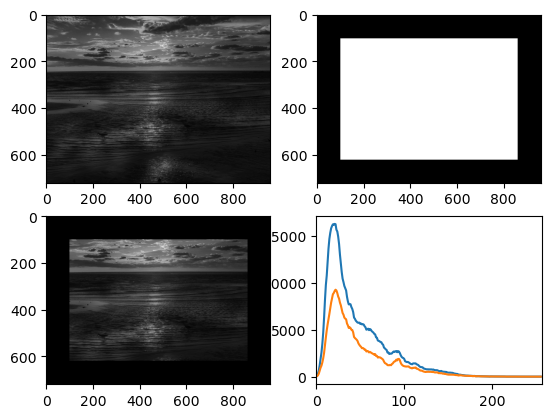

In [19]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [20]:
img = cv2.imread('sunset.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

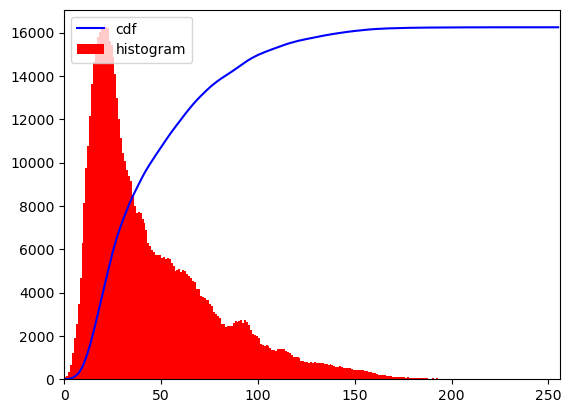

In [21]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [22]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [23]:
img2 = cdf[img]

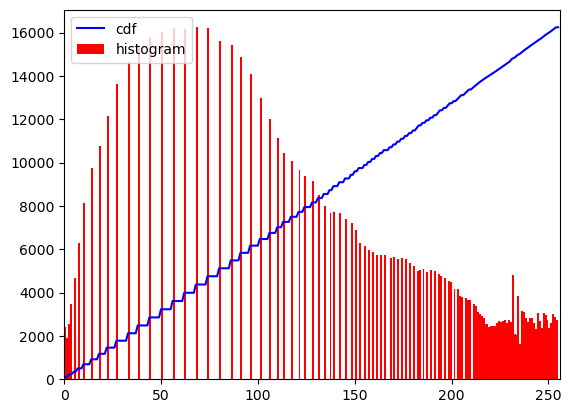

In [24]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

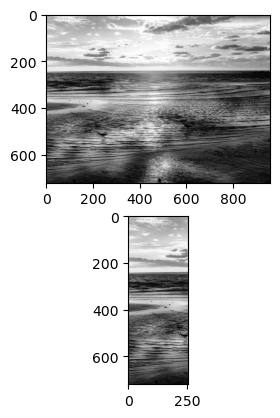

In [25]:
plt.subplot(211), plt.imshow(img2, 'gray')
plt.subplot(212), plt.imshow(img2,'gray')

plt.xlim([0,256])
plt.show()

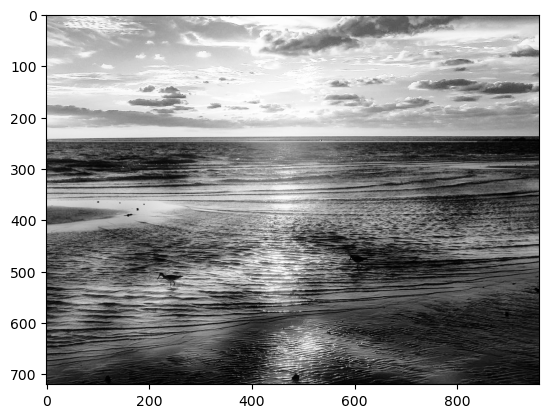

In [26]:
plt.imshow(img2,'gray')
plt.show()